In [16]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats
from tensorflow.keras.datasets import cifar10


In [17]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# CIFAR-10 class names
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]
print("Classes:", class_names)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


**Visualize Sample Images**

/tmp/ipython-input-1348162822.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[idx])])


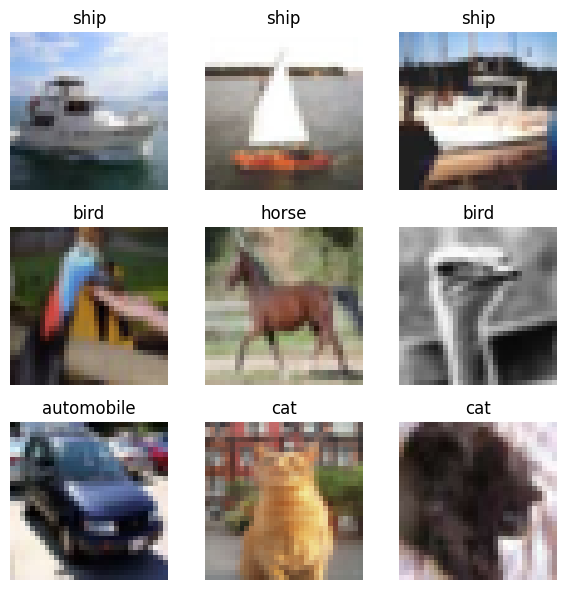

In [18]:
# Choose 9 random images from the training set
np.random.seed(42)
sample_idx = np.random.randint(0, len(x_train), 9)

plt.figure(figsize=(6,6))
for i, idx in enumerate(sample_idx):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[idx])
    plt.axis('off')
    plt.title(class_names[int(y_train[idx])])
plt.tight_layout()
plt.show()

In [19]:
selected_classes = [0, 1, 2]  # airplane, automobile, cat

**Extract Simple Numerical Features**

In [1]:
def extract_features(images):
    """
    images: numpy array (N, 32, 32, 3)
    returns:
        mean_rgb: average value of R, G, B channels per image
        mean_intensity: average of all pixels per image
    """
    mean_rgb = images.mean(axis=(1,2))            # (N, 3)
    mean_intensity = images.mean(axis=(1,2,3))    # (N,)
    return mean_rgb, mean_intensity

**Analyze Distributions for Each Class**

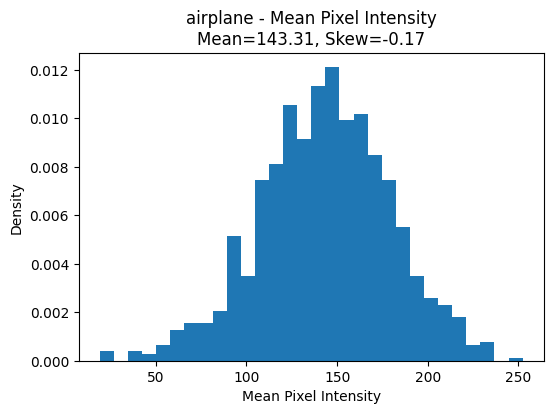

Class: airplane
 Mean Intensity: 143.31
 Skewness: -0.17
----------------------------------------


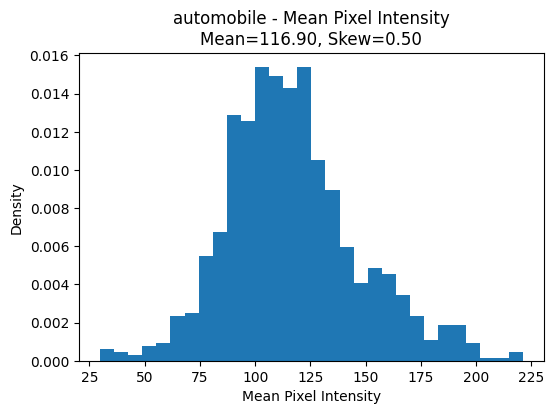

Class: automobile
 Mean Intensity: 116.90
 Skewness: 0.50
----------------------------------------


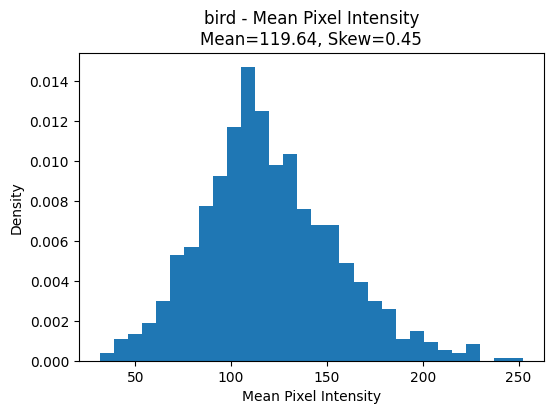

Class: bird
 Mean Intensity: 119.64
 Skewness: 0.45
----------------------------------------


In [21]:
for cls in selected_classes:
    # select subset (first 1000 samples for speed)
    idxs = np.where(y_train.flatten() == cls)[0][:1000]
    imgs = x_train[idxs]

    # extract features
    mean_rgb, mean_intensity = extract_features(imgs)

    # compute stats
    mean_val = np.mean(mean_intensity)
    skew_val = pd.Series(mean_intensity).skew()

    # plot histogram
    plt.figure(figsize=(6,4))
    plt.hist(mean_intensity, bins=30, density=True)
    plt.title(f"{class_names[cls]} - Mean Pixel Intensity\nMean={mean_val:.2f}, Skew={skew_val:.2f}")
    plt.xlabel("Mean Pixel Intensity")
    plt.ylabel("Density")
    plt.show()

    print(f"Class: {class_names[cls]}")
    print(f" Mean Intensity: {mean_val:.2f}")
    print(f" Skewness: {skew_val:.2f}")
    print("-"*40)


**Compare Class-wise Mean Distributions**


/tmp/ipython-input-3569220074.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(means, labels=[class_names[i] for i in selected_classes])


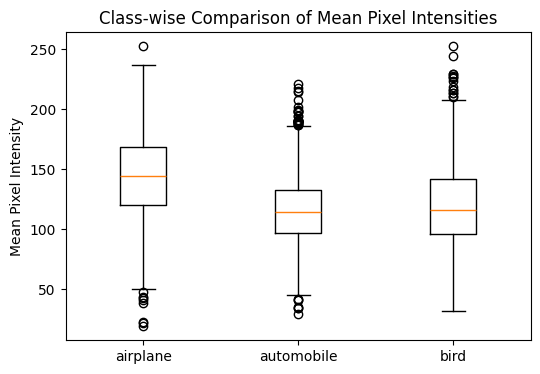

In [22]:
means = []
for cls in selected_classes:
    idxs = np.where(y_train.flatten()==cls)[0][:1000]
    imgs = x_train[idxs]
    _, mean_intensity = extract_features(imgs)
    means.append(mean_intensity)

plt.figure(figsize=(6,4))
plt.boxplot(means, labels=[class_names[i] for i in selected_classes])
plt.title("Class-wise Comparison of Mean Pixel Intensities")
plt.ylabel("Mean Pixel Intensity")
plt.show()


**RGB Channel Analysis**

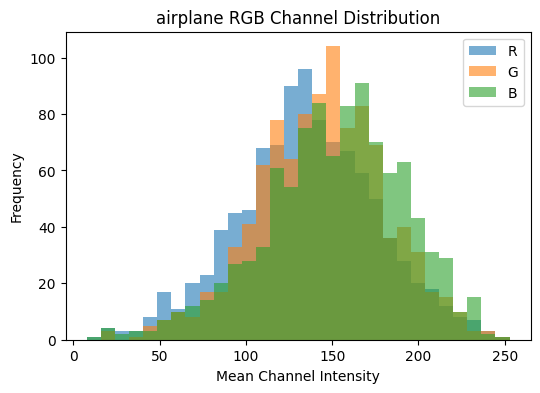

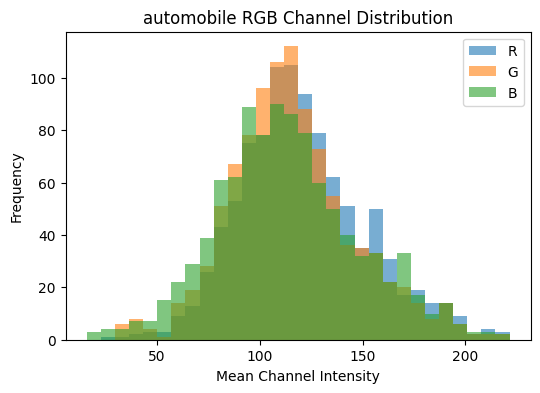

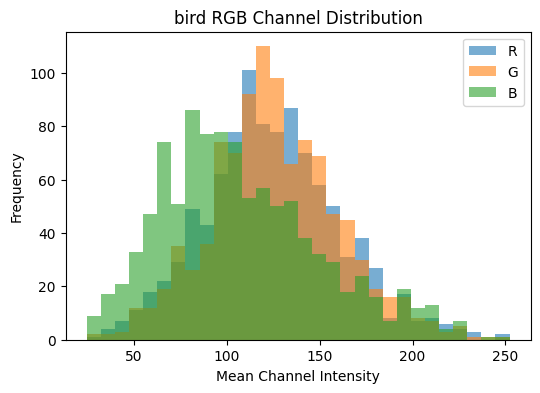

In [23]:
for cls in selected_classes:
    idxs = np.where(y_train.flatten()==cls)[0][:1000]
    imgs = x_train[idxs]
    mean_rgb, _ = extract_features(imgs)
    df_rgb = pd.DataFrame(mean_rgb, columns=['R','G','B'])
    df_rgb.plot(kind='hist', bins=30, alpha=0.6, figsize=(6,4), title=f"{class_names[cls]} RGB Channel Distribution")
    plt.xlabel("Mean Channel Intensity")
    plt.show()


**Compute Distribution Summary Table**


In [24]:
records = []
for cls in selected_classes:
    idxs = np.where(y_train.flatten()==cls)[0][:1000]
    imgs = x_train[idxs]
    _, mean_intensity = extract_features(imgs)
    records.append({
        "Class": class_names[cls],
        "Mean": np.mean(mean_intensity),
        "Std": np.std(mean_intensity),
        "Skewness": pd.Series(mean_intensity).skew(),
        "Kurtosis": pd.Series(mean_intensity).kurt()
    })

df_summary = pd.DataFrame(records)
display(df_summary)

,Class,Mean,Std,Skewness,Kurtosis
0,airplane,143.305797,36.327070,-0.166160,0.156484
1,automobile,116.895153,29.930547,0.495432,0.543621
2,bird,119.635669,35.292795,0.453388,0.355429
